# Introduction

This is an EDA notebook for the Amazon's top 50 bestsellers (2009-2019) dataset. In this notebook, I've tried to display the distributions of the various features in the notebook as well as creating and inferring the trends of a few features. I've focused on making visualizations more in the notebook to convey the useful information from the dataset.

### Note

This is my first ever notebook submission, so if you find it useful then please feel free to upvote it. Any form of opinion/suggestion is valuable to me so do not hesitate to do so in the comments. I'll be trying to improve myself. :)
Thank you :)

***

# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')


***

# Importing the Data

In [6]:
df = pd.read_csv('data/bestsellers.csv')

***

# Data Preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


There were no missing values in the dataset but there were a few mistakes that needed correction.

In [8]:
df['Author'].unique()

array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

Some of the author's name have been misspelled so we'll manipulate the data to correct the mistakes first.

In [9]:
df.loc[df['Author']=='J. K. Rowling','Author']='J.K. Rowling'
df.loc[df['Author']=='George R. R. Martin','Author']='George R.R. Martin'

***

# EDA

Let's start off by finding out the 10 ten most reviewed books during 2009-2019

In [10]:
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


As we can see from the table above, the list consists of <b>duplicate</b> entries of Books as many books were chosen as the bestsellers for <b><i>more than one</i></b> year. 


Therefore, we'll find the names of the top 10 most reviewed books without multiple entries.

In [11]:
df.drop_duplicates('Name').sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


Let's look at the proportion of books whose Genre was Fiction and Non-Fiction.

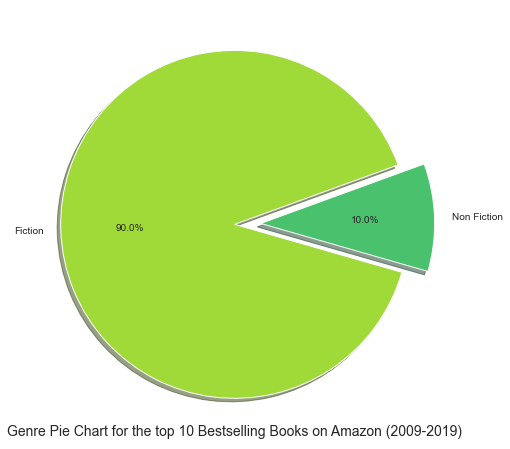

In [12]:
pie_1 = df.drop_duplicates('Name').sort_values('Reviews',ascending=False)['Genre'].head(10).value_counts()

sns.set_palette('viridis_r')
plt.figure(figsize=(8,8))
plt.pie(pie_1,explode = [0,0.15],labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)',fontdict={'size':14},y=0);

The distribution plot for the Price of the books:

/home/jay/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


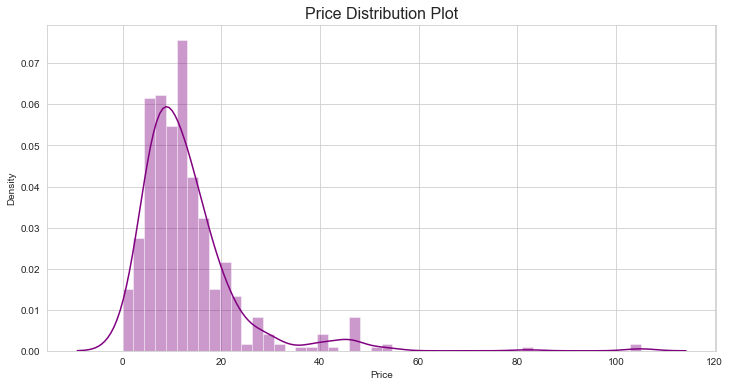

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(df['Price'],color='purple')
plt.title('Price Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')

The distribution plot for the Reviews of the books:

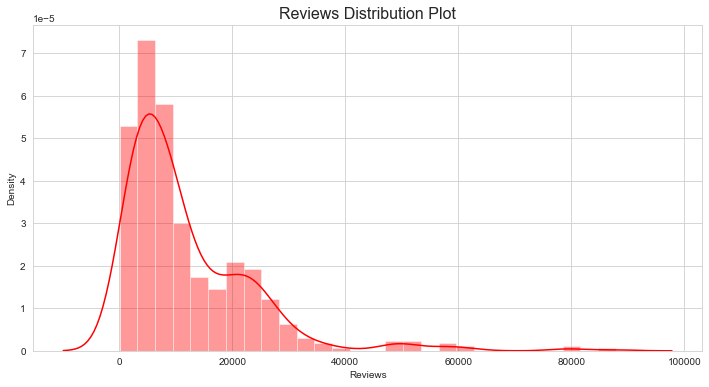

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(df['Reviews'],color='red')
plt.title('Reviews Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')

As we can see, the distribution is a right skewed.

Here's a plot to see the distribution of the User Rating across all the books:

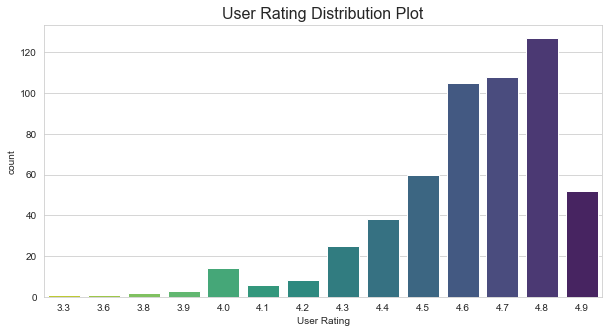

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=16)
plt.show()

I was curious about the correlation between the Price and the Reviews feature so I plotted them out to see if there's any correlation between these two.

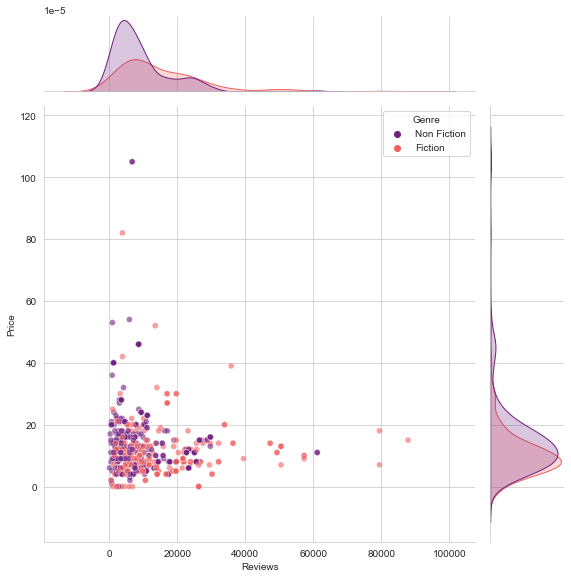

In [16]:
sns.jointplot(y=df['Price'],x=df['Reviews'],hue=df['Genre'],alpha=0.6,palette='magma',height=8)
plt.show()

From the plot above, we can see that the Review values of some books seem like probable outliers.
Let's test this out using some statistical techniques.

Since the distribution seems skewed, I'll use the IQR method to find the minimum and maximum range of the values for the plot.

In [17]:
IQR_r = df['Reviews'].quantile(0.75)-df['Reviews'].quantile(0.25)

upper_limit = df['Reviews'].quantile(0.75)+IQR_r*1.5
lower_limit = df['Reviews'].quantile(0.75)-IQR_r*1.5

ex_lower_limit = df['Reviews'].quantile(0.75)-IQR_r*3
ex_upper_limit = df['Reviews'].quantile(0.75)+IQR_r*3

print('Outlier\'s range :\t',[lower_limit,upper_limit])
print('Extreme Outlier\'s range:',[ex_lower_limit,ex_upper_limit])

Outlier's range :	 [-2539.625, 37046.125]
Extreme Outlier's range: [-22332.5, 56839.0]


Since the lower limits are negative values, we'll discard it since number of Reviews can't be negative.

Now let's plot the "upper limit" lines on the earlier scatter plot to see where the outliers lie

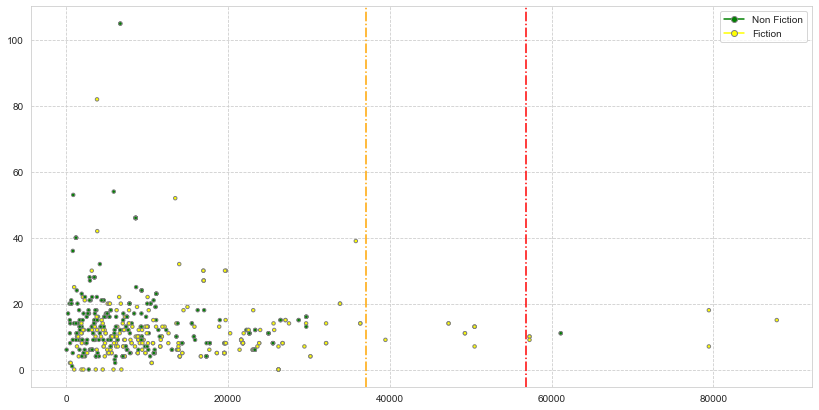

In [18]:
custom_lines = [Line2D([0], [0], marker='o', color='green', markeredgecolor='grey'),
                Line2D([0], [0], marker='o', color='yellow', markeredgecolor='grey')]

colors={'Non Fiction': 'green','Fiction':'yellow'}
fig,ax = plt.subplots(figsize=(14,7))
ax.scatter(x=df['Reviews'],y=df['Price'],c=df['Genre'].apply(lambda x:colors[x]),marker='o',s=12,alpha=1,edgecolor='grey')
ax.axvline(x=upper_limit,color='orange',ls='-.')
ax.axvline(x=ex_upper_limit,color='red',ls='-.')
ax.grid(True,ls='--')
ax.legend(custom_lines,['Non Fiction','Fiction'])
plt.show()

As we can see from the plot above, the orange line signifies the upper limit beyond which points which can be considered as outliers and the red line signifies the upper limit beyond which the points are classified as extreme outliers.

The outliers can affect the machine learning model depending upon the algorithm for whether or not it's robust against outliers.

Finally, I made a heatmap to see how all the numeric features in the dataset are correlated with each other:

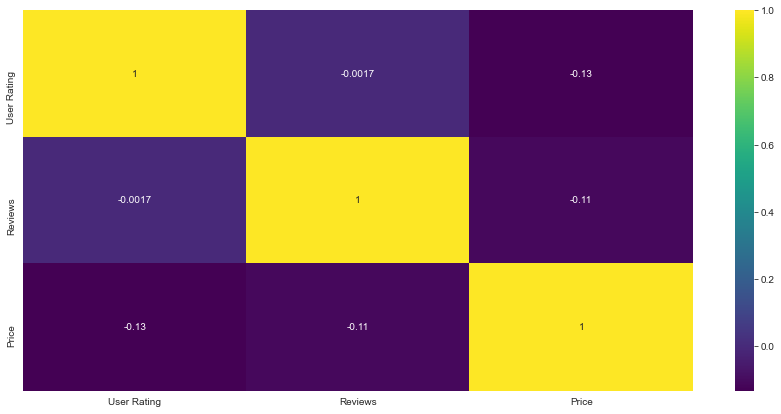

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.drop(['Name','Genre','Author','Year'],axis=1).corr(),cmap='viridis',annot=True)
plt.show()

With the heatmap, it can be easily inferred that the features have very less correlation coefficient with respect to each other.

Now, we'll try to find the most famous Author on the basis of the number of different books which were counted as the Bestsellers on Amazon and to see IF there's any correlation between the books.

In [20]:
Counter(df.drop_duplicates('Name')['Author']).most_common()[0]

('Jeff Kinney', 12)

Now we've seen that Jeff Kinney was the most famous author when it comes to the number of books which were selected as Bestsellers.

In [21]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author']=='Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


As we can see, most of the books which were on the list are from his very famous book series, <i><b>Diary Of A Wimpy Kid.</b></i>

Now, let's take a look at the 10 most famous authors from both the Fiction and Non Fiction genre on the basis of the number of appearances in the top 50 list of Bestsellers from 2009-2019.

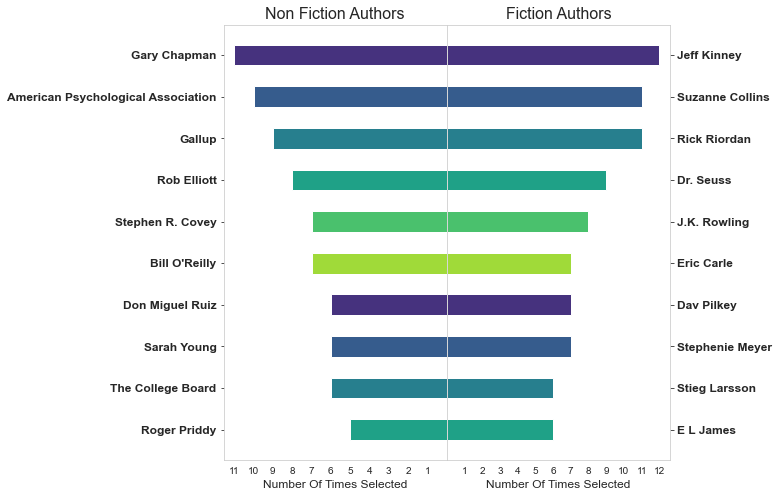

In [22]:
best_nf_books = df.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending=False)[:10]
best_f_books = df.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending=False)[:10]

color=sns.color_palette('viridis')

sns.set_style('whitegrid')

fig,axes = plt.subplots(1,2,figsize=(8,8))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index,color=color)
axes[0].set_yticklabels(best_nf_books.index,fontweight='semibold',fontsize=12)
axes[0].set_title('Non Fiction Authors',fontdict={'size':16})
axes[0].set_xlabel('Number Of Times Selected',fontsize=12)

axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index,color=color)
axes[1].set_yticklabels(best_f_books.index,fontweight='semibold',fontsize=12)
axes[1].set_title('Fiction Authors',fontdict={'size':16})
axes[1].set_xlabel('Number Of Times Selected',fontsize=12)

plt.show()

We can see the trend of the genre of books which were selected in the top 50s each year:

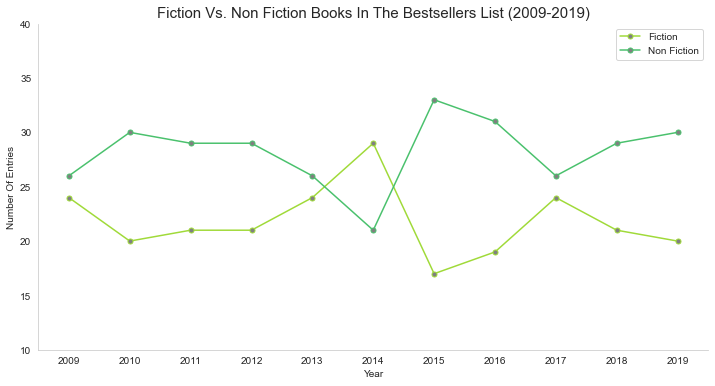

In [23]:
books = df.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='grey',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Entries')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)',fontdict={'size':15})
plt.grid(0)

plt.show()

From the plot, we can infer that non fiction books have been selected more in the top 50 list of bestsellers than the fiction books.

I made this final plot where I took the top 20 authors based on their number of appearances in the top 50 list to find out their:
1. Average User Rating
2. Average Price Of The Books
3. Total Reviews

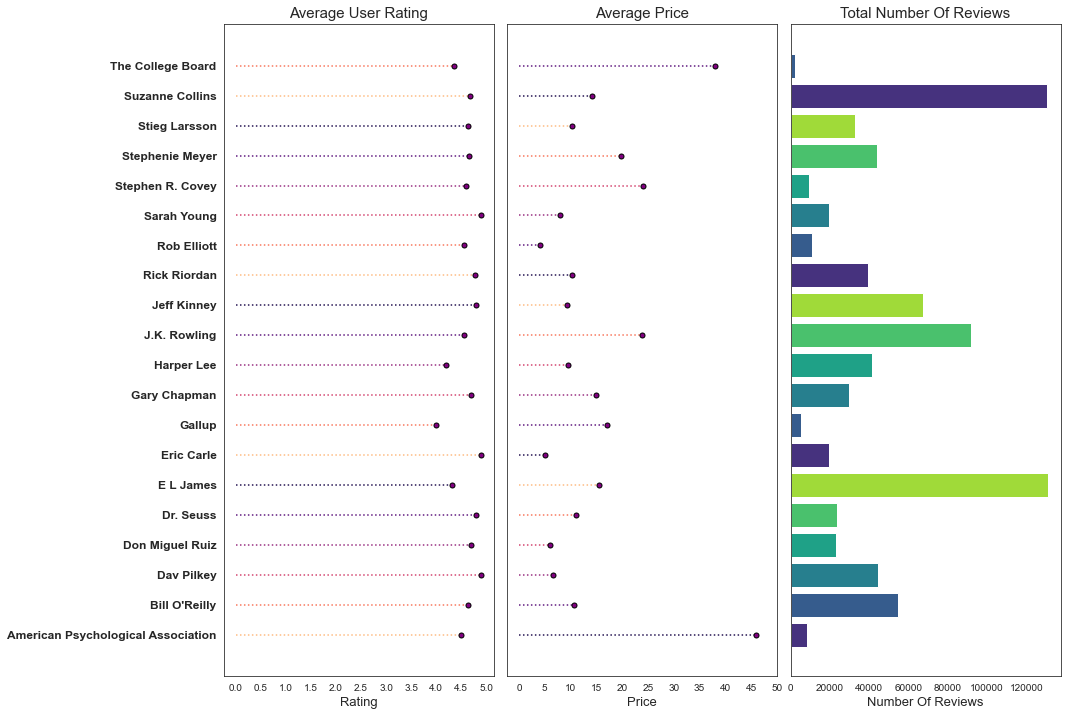

In [24]:
color=sns.color_palette('viridis')
c1=sns.color_palette('magma')
c2=sns.color_palette('magma_r')

new_df = df.drop_duplicates('Name')

df1 = df.groupby('Author').count().sort_values('Name',ascending=False)[:20]
index = df1.index
main_df = pd.DataFrame(new_df[df['Author']==index[0]])

for i in index[1:]:
    sub_df = new_df[new_df['Author']==i]
    main_df = pd.concat([main_df,sub_df])
    

main_df1 = main_df.groupby('Author').sum()
main_df2 = main_df.groupby('Author').mean()

fig, ax = plt.subplots(1,3,figsize=(15,12),sharey=True)
plt.subplots_adjust(wspace=0.05)

ax[0].hlines(xmin=0,xmax=main_df2['User Rating'].values,y=main_df2['User Rating'].index,linestyle='dotted',color=c2)
ax[0].plot(main_df2['User Rating'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[0].set_xticks(np.linspace(0,5,11))
ax[0].set_xlabel('Rating',fontsize=13)
ax[0].set_title('Average User Rating',fontsize=15)
ax[0].set_yticklabels(main_df2['User Rating'].index,fontweight='bold',fontsize=12)

ax[1].hlines(xmin=0,xmax=main_df2['Price'].values,y=main_df2['Price'].index,linestyle='dotted',color=c1)
ax[1].plot(main_df2['Price'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[1].set_xticks(list(range(0,51,5)))
ax[1].set_xlabel('Price',fontsize=13)
ax[1].set_title('Average Price',fontsize=15)

ax[2].barh(y=main_df1['Reviews'].index,width=main_df1['Reviews'].values,color=color)
ax[2].set_xlabel('Number Of Reviews',fontsize=13)
ax[2].set_title('Total Number Of Reviews',fontsize=15)

plt.show()
filterwarnings('ignore')

We can see from the plot the 2 most expensive books from American Psychological Association and the College Board, have really less reviews even though their user ratings are high which means that regardless of their less sales, they still made it to the top 50 Bestsellers.

With this I conclude the EDA of the Amazon Bestsellers (2009-2019) dataset.

***

# <center>Thank You!